In [1]:
import pandas as pd

In [2]:
granularity = 50

if granularity == 50:

    df_gdp = pd.read_csv("../gdp_analysis/results/gdp_weighted_pop_fifty.csv")
    df_gdp = df_gdp.rename(columns={"region": "region_name"})

    #df_cultura = pd.read_csv("../unseen_species_model/results/occupation/raw_results.csv", index_col = [0])
    df_cultura = pd.read_csv("../unseen_species_model/results_50/raw_results.csv", index_col = [0])

elif granularity == 10:

    df_gdp = pd.read_csv("../gdp_analysis/results/gdp_weighted_pop_decade.csv")
    df_gdp = df_gdp.rename(columns={"region": "region_name"})

    df_cultura = pd.read_csv("../unseen_species_model/results_10/raw_results.csv", index_col = [0])


df_cultura['N_est'] = df_cultura['f0'] + df_cultura['f1'] + df_cultura['f2']# plus the individual
df_cultura = df_cultura.groupby(['region_name', 'decade']).agg({'N_est': 'sum', 'individual_wikidata_id':'count'}).reset_index()
df_cultura = df_cultura.rename(columns={"individual_wikidata_id": "score"})
df_cultura['survival_ratio'] = df_cultura['score']/df_cultura['N_est']

df = pd.merge(df_gdp, df_cultura, on = ['region_name', 'decade'])
df = df.rename(columns = {'decade': 'year', 'gdp_pc_weighted':'gdp_per_capita'})
df['score_cap'] = df['score']/df['pop']
df['N_est_cap'] = df['N_est']/df['pop']
    
if granularity == 10:
    df = df[df['year']>=1800]

list(set(df.region_name))
df.region_name.value_counts()

region_name
Greek World         14
United Kingdom      14
Chinese world       12
France              12
Nordic countries    12
Spain               12
Low countries       11
Italy                9
Japan                9
German world         8
Arabic world         7
Portugal             7
Indian world         6
Korea                2
Persian world        2
Name: count, dtype: int64

In [ ]:
df_norm = df[['region_name', 'year', 'gdp_per_capita', 'N_est']].copy()

In [3]:



df_1850 = df_norm[df_norm['year']==1850]
df_1850 = df_1850.rename(columns = {'gdp_per_capita': 'gdp_per_capita_1850'})
df_1850 = df_1850.drop(columns = ['N_est', 'year'])

df_norm = pd.merge(df_norm, df_1850, on = ['region_name'])
df_norm['N_est_norm'] = df_norm['N_est']/df_norm['gdp_per_capita_1850']

set(df_norm.region_name)

{'Arabic world',
 'Chinese world',
 'France',
 'German world',
 'Greek World',
 'Indian world',
 'Italy',
 'Japan',
 'Korea',
 'Low countries',
 'Nordic countries',
 'Persian world',
 'Portugal',
 'Spain',
 'United Kingdom'}

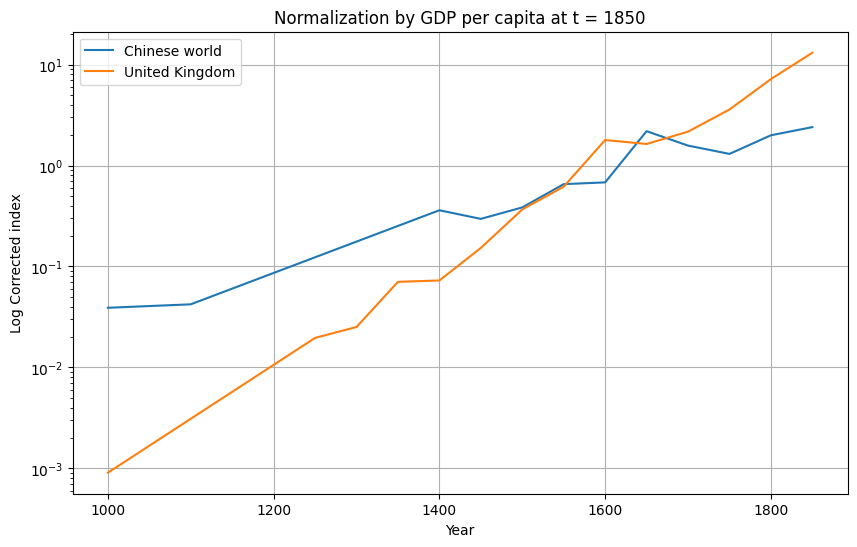

In [4]:


import matplotlib.pyplot as plt
# Filter data for United Kingdom and Chinese World
filtered_df = df_norm[df_norm['region_name'].isin(['United Kingdom', 'Chinese world'])]


# Plot N_est for each region
plt.figure(figsize=(10, 6))
for region, region_data in filtered_df.groupby('region_name'):
    plt.plot(region_data['year'], region_data['N_est_norm'], label=region)


plt.yscale('log')
plt.title('Normalization by GDP per capita at t = 1850')
plt.xlabel('Year')
plt.ylabel('Log Corrected index')
plt.legend()
plt.grid(True)
plt.show()

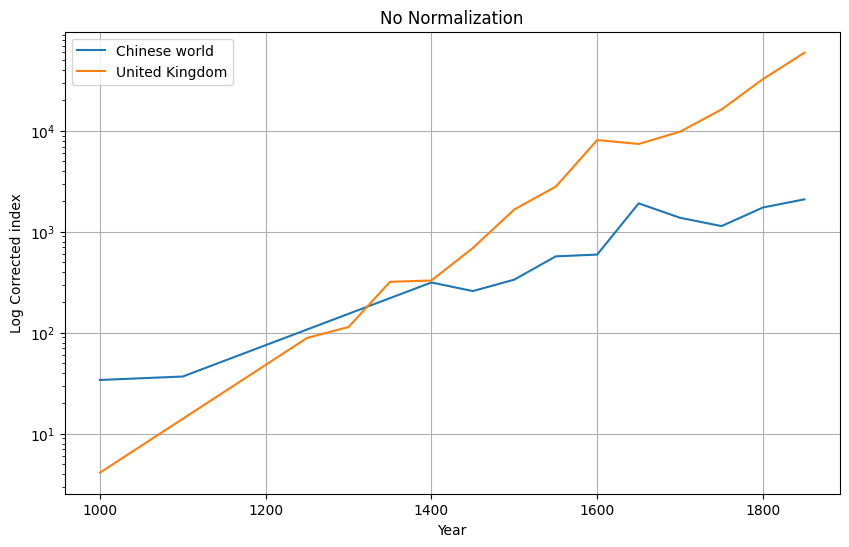

In [5]:
# Plot N_est for each region
plt.figure(figsize=(10, 6))
for region, region_data in filtered_df.groupby('region_name'):
    plt.plot(region_data['year'], region_data['N_est'], label=region)

plt.yscale('log')
plt.title('No Normalization')
plt.xlabel('Year')
plt.ylabel('Log Corrected index')
plt.legend()
plt.grid(True)
plt.show()